In [1]:
# tratamiento de datos
import pandas as pd
import numpy as np

# visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

#configuracion de ruta
import sys
sys.path.append('../')

from SRC.soporte import mostrar_distribuciones, graficas_tasas_conversion, merge_graficas_tasas_conversion

In [2]:
df = pd.read_csv('../DATA/OUTPUT/bank-additional_limpio.csv')

In [3]:
df.head()

,age,job,marital,education,housing,loan,duration,campaign,emp.var.rate,cons.price.idx,...,euribor3m,nr.employed,y,date,id_,education_grouped,campaign_capped,emp_var_context,conf_idx_cat,euribor_cat
0,29.0,housemaid,MARRIED,basic.4y,0.0,0.0,261,1,1.1,93.994,...,4.857,5191.0,no,2019-08-02,089b39d8-e4d0-461b-87d4-814d71e0e079,Basic,1,Estable,Medium,High
1,57.0,services,MARRIED,high.school,0.0,0.0,149,1,1.1,93.994,...,NaN,5191.0,no,2016-09-14,e9d37224-cb6f-4942-98d7-46672963d097,Secondary,1,Estable,Medium,Unknown
2,37.0,services,MARRIED,high.school,1.0,0.0,226,1,1.1,93.994,...,4.857,5191.0,no,2019-02-15,3f9f49b5-e410-4948-bf6e-f9244f04918b,Secondary,1,Estable,Medium,High
3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,151,1,1.1,93.994,...,NaN,5191.0,no,2015-11-29,9991fafb-4447-451a-8be2-b0df6098d13e,Basic,1,Estable,Medium,Unknown
4,56.0,services,MARRIED,high.school,0.0,1.0,307,1,1.1,93.994,...,NaN,5191.0,no,2017-01-29,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,Secondary,1,Estable,Medium,Unknown


## OBJETIVO DEL ANALISIS
- entender que clientes son más propensos a decir "Sí"
- identificar cuándo es más efectivo llamar y cuántas veces se debe insistir
- identificar qué perfiles deberían ser priorizados en campañas futuras

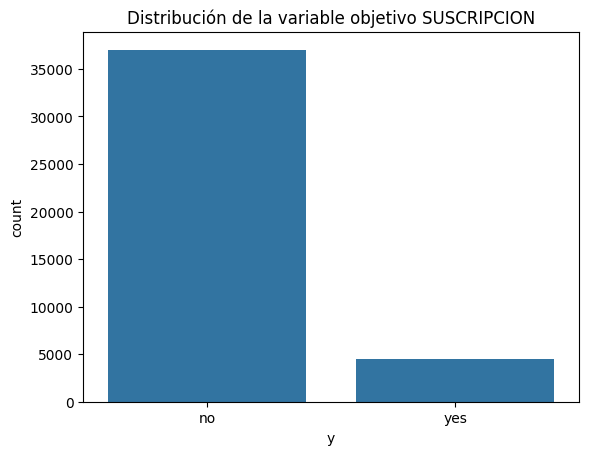

In [4]:
sns.countplot(x='y', data=df)
plt.title('Distribución de la variable objetivo SUSCRIPCION')
plt.show()

In [5]:
columnas_graficar = ['age','job','marital','education_grouped', 'emp_var_context',]

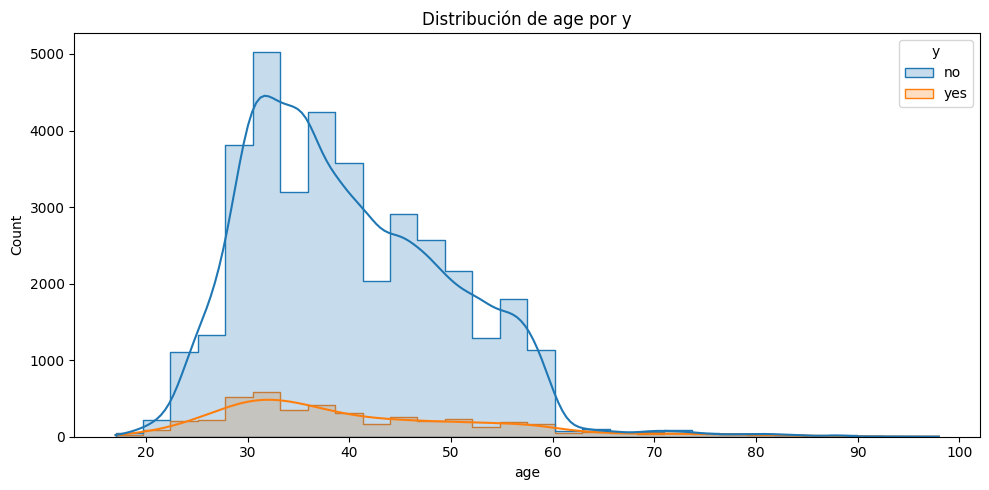

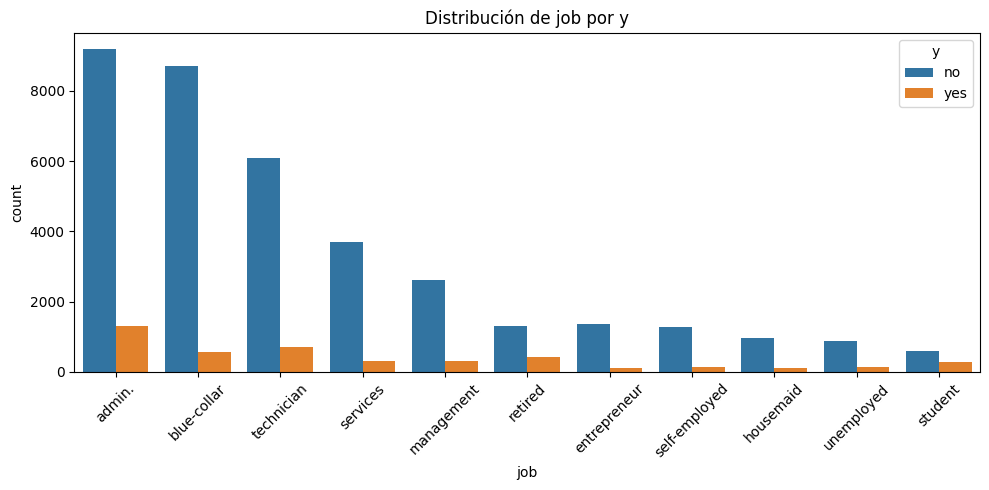

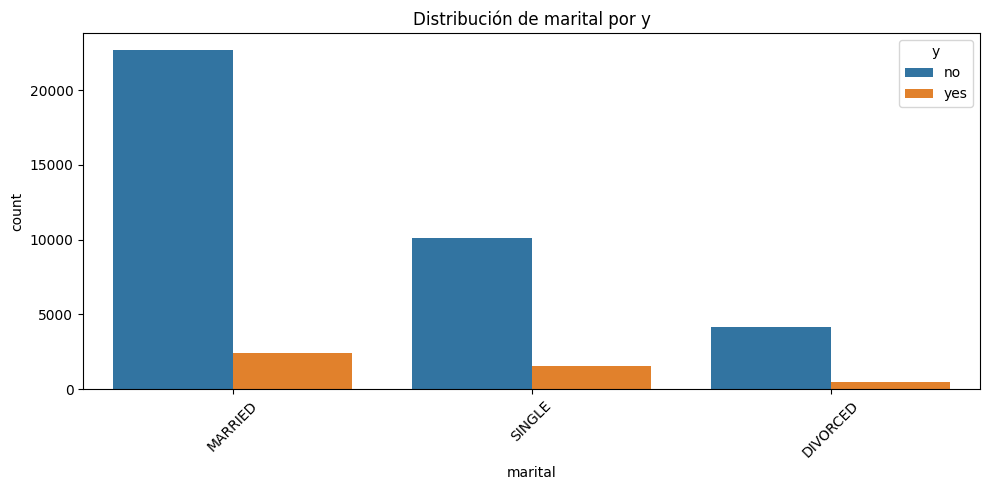

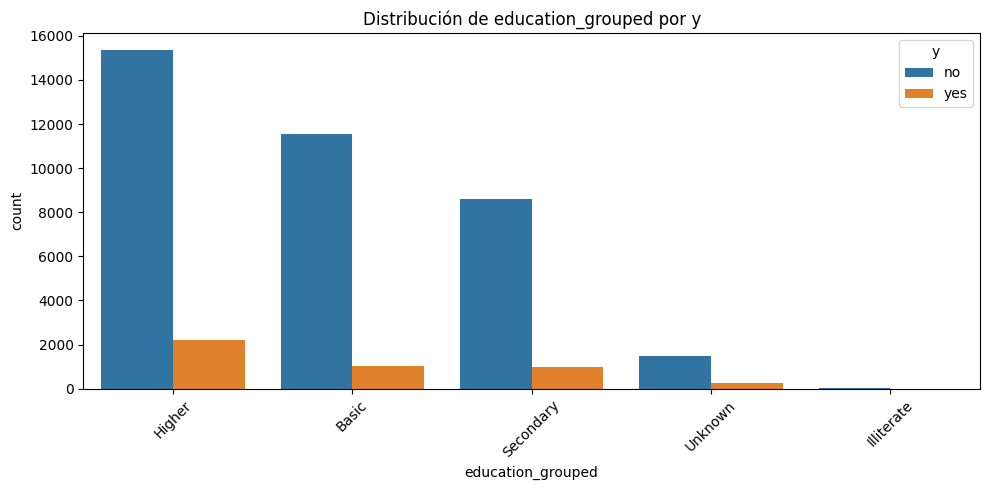

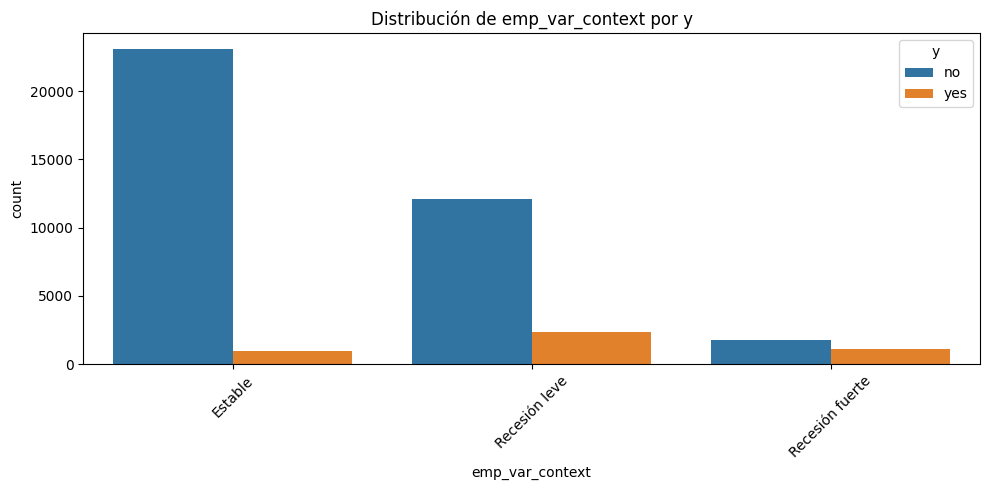

In [6]:
mostrar_distribuciones(df,columnas_graficar)

 ANALISIS LOS CLIENTES QUE SI ADQUIRIERON EL SERVICIO EN LA LINEA DEL TIEMPO

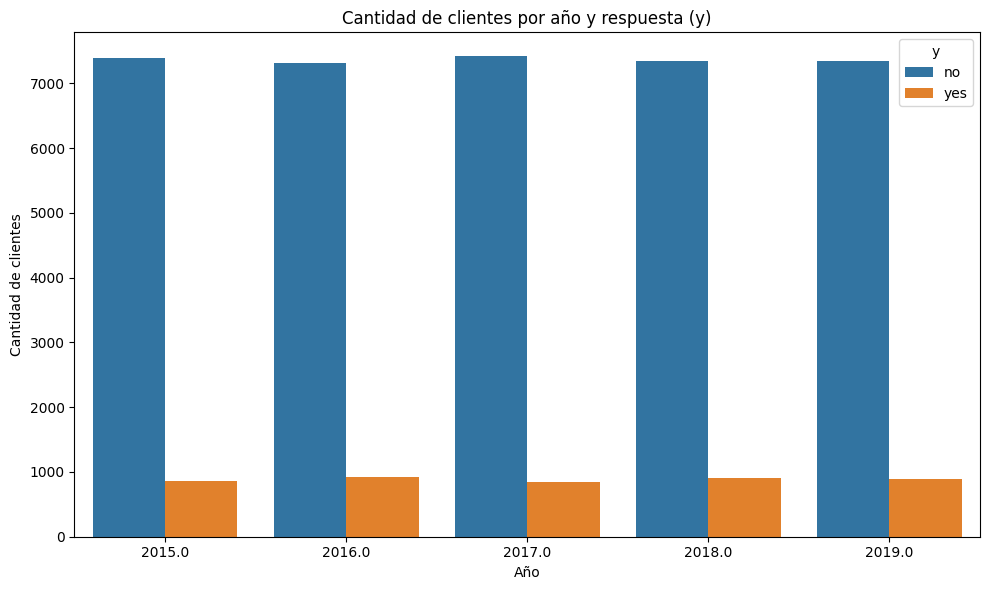

In [7]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

df['year'] = df['date'].dt.year
clientes_por_año = df.groupby(['year', 'y']).size().reset_index(name='cantidad')

# Graficar
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=clientes_por_año, x='year', y='cantidad', hue='y')
plt.title('Cantidad de clientes por año y respuesta (y)')
plt.xlabel('Año')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [8]:
dicc_y = {'yes': 1, 'no':0}
binario = df['y'].map(dicc_y)
df['y_bin'] = binario

In [9]:
df.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'duration',
       'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'date', 'id_', 'education_grouped',
       'campaign_capped', 'emp_var_context', 'conf_idx_cat', 'euribor_cat',
       'year', 'y_bin'],
      dtype='object')

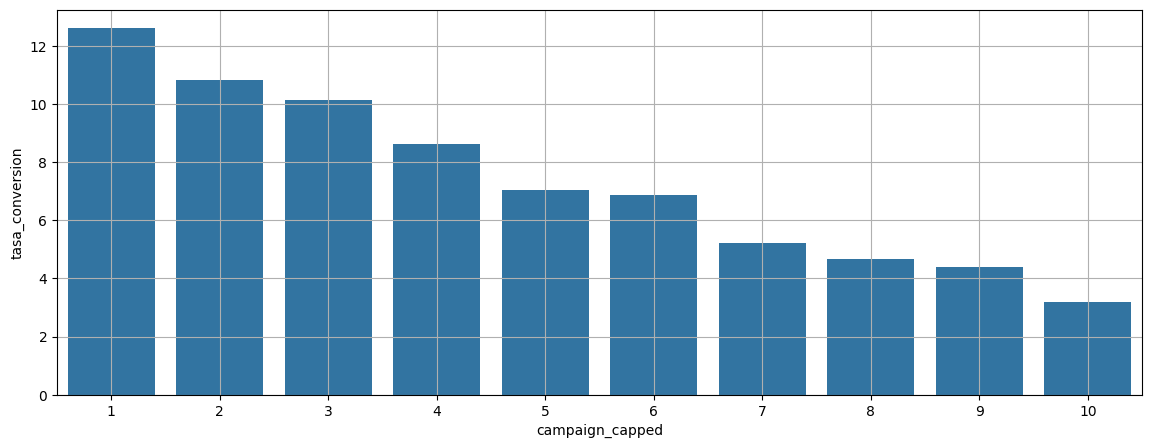

In [10]:
graficas_tasas_conversion(df,'campaign_capped','y_bin', type='bar')

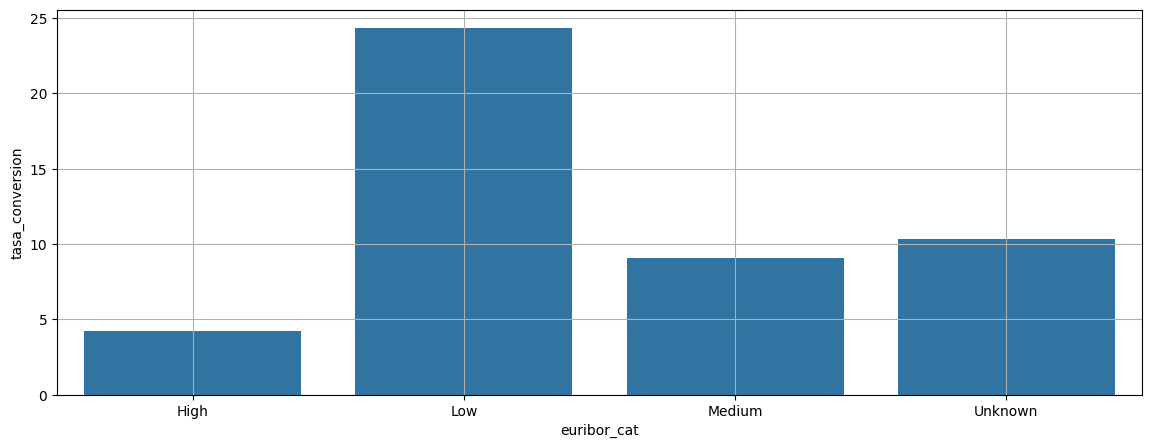

In [11]:
graficas_tasas_conversion(df,'euribor_cat','y_bin', type='bar')

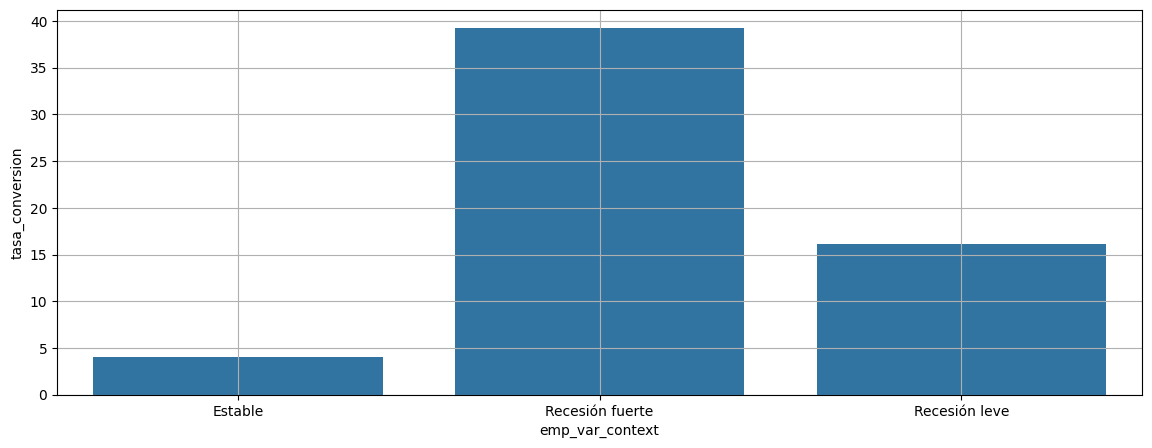

In [12]:
graficas_tasas_conversion(df,'emp_var_context','y_bin', type='bar')

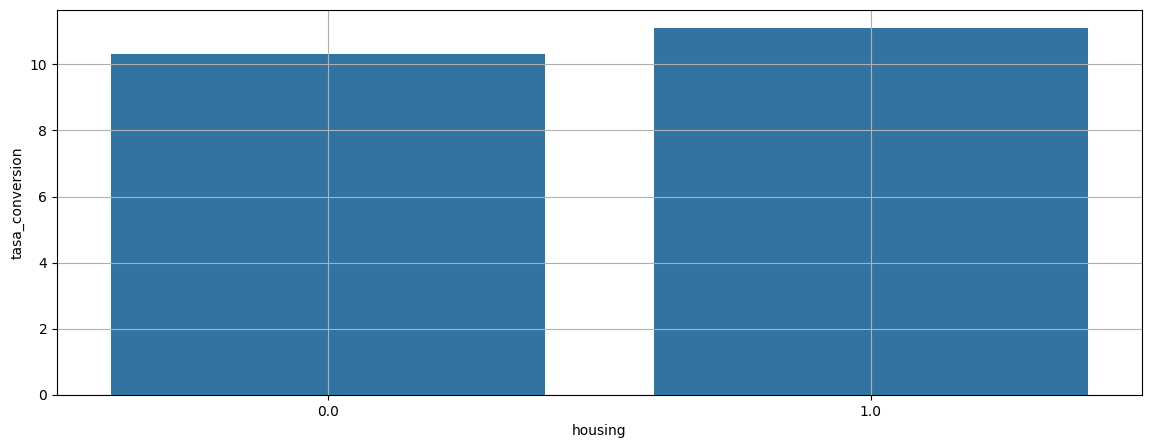

In [13]:
graficas_tasas_conversion(df,'housing','y_bin', type='bar')

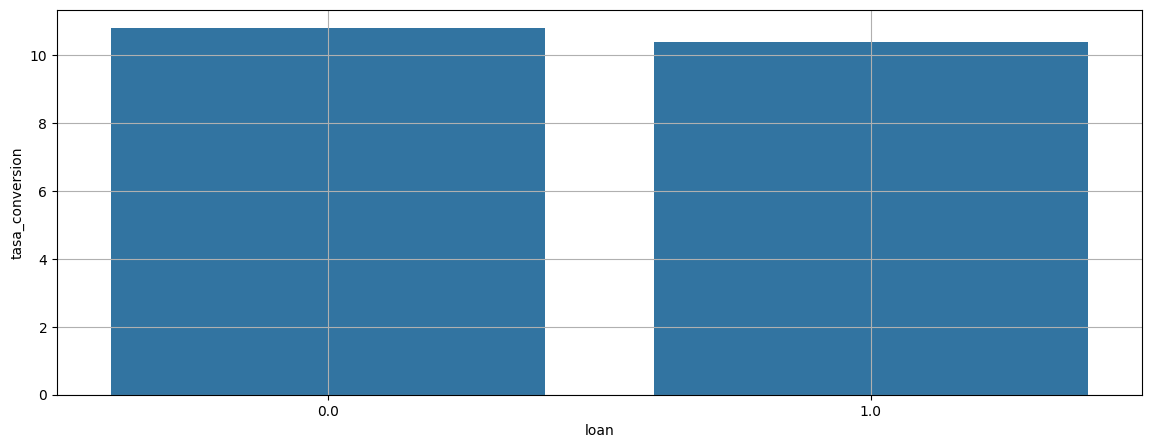

In [14]:
graficas_tasas_conversion(df,'loan','y_bin', type='bar')

## CONCLUSIONES
- los clientes que adquirieron el servicio en su mayoria son de 30 a 38 años, de ocupacion admin y technician, casados y con una educacion superior/tecnica, con una leve recesion en la tasa de variacion de empleo.
- Podemos concluir que tenemos mas probabilidades de vender los servicios cuando la tasa de interes sea baja, el contacto con los clientes sea de maximo 3 veces, la tasa de variacion de empleo sea fuerte. Contrario a lo esperado, vemos que durante periodos de mayor recesión económica —medida por una tasa de variación del empleo más negativa— la tasa de conversión hacia la suscripción es más alta. si el cliente cuenta con algun tipo de prestamo es menos probable que adquiera el servicio

## abrimos el segundo archivo con los detalles del consumidor

In [15]:
datos_excel = pd.read_excel('../DATA/RAW/customer-details.xlsx', sheet_name=None, index_col=0)

In [16]:
# concatenamos todas las hojas de nuestro excel
datos_excel_concat = pd.concat(datos_excel)
datos_excel_concat.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'NumWebVisitsMonth',
       'ID'],
      dtype='object')

In [17]:
# renombramos la columna 'ID' para que coincida con nuestro df original
datos_excel_concat = datos_excel_concat.rename(columns={'ID': 'id_'})
datos_excel_concat.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'NumWebVisitsMonth',
       'id_'],
      dtype='object')

In [18]:
df.shape

(41466, 23)

In [19]:
# combinamos el df original con las hojas de excel que descargamos ahora con el metodo MERGE y funcion INNER (solo coincidencias exactas en ambas columnas)
merged_data = pd.merge(datos_excel_concat, df, on= 'id_', how='inner')

In [20]:
# copiamos nuestro DF combinado para trabajar
df_merge = merged_data.copy()

In [21]:
df_merge.shape

(41466, 28)

In [22]:
df_merge.columns = df_merge.columns.str.lower()
df_merge.columns

Index(['income', 'kidhome', 'teenhome', 'dt_customer', 'numwebvisitsmonth',
       'id_', 'age', 'job', 'marital', 'education', 'housing', 'loan',
       'duration', 'campaign', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'date',
       'education_grouped', 'campaign_capped', 'emp_var_context',
       'conf_idx_cat', 'euribor_cat', 'year', 'y_bin'],
      dtype='object')

In [23]:
# creamos una nueva columna que sea grupo de income para agrupar
df_merge['range_income'] = pd.cut(df_merge['income'],
                                   bins=[0, 24999, 44999, 64999, 84999, 104999, 124999, 144999, 164999, float('inf')], 
                                   labels=['5000-24999', '25000-44999', '45000-64999', '65000-84999', '85000-104999','105000-124999', '125000-144999', '145000-164999', '165000-185000'],
                                   right=True)
print(df_merge[['income', 'range_income']].head())

   income   range_income
0  161770  145000-164999
1   85477   85000-104999
2  147233  145000-164999
3  121393  105000-124999
4   63164    45000-64999


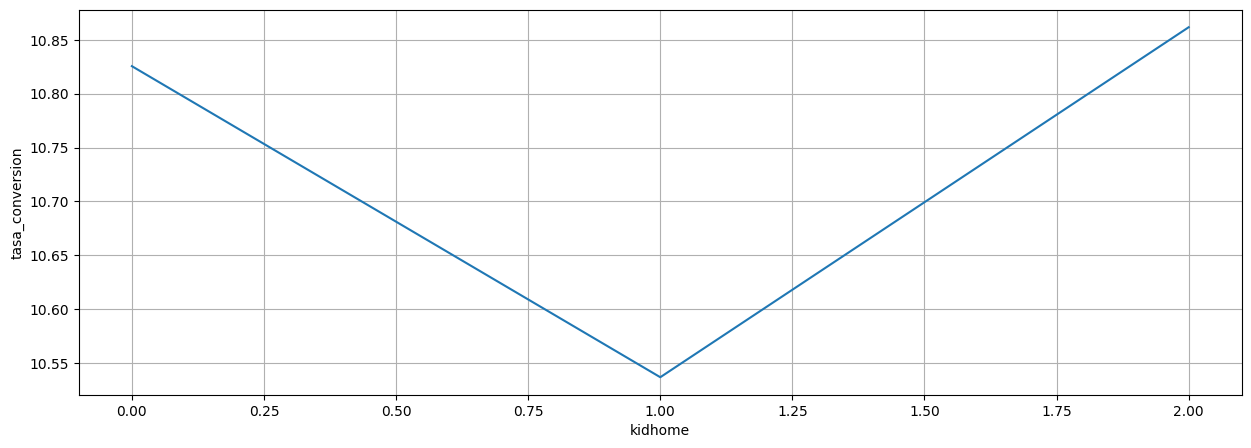

In [27]:
merge_graficas_tasas_conversion(df_merge, 'kidhome','y_bin', type='line')

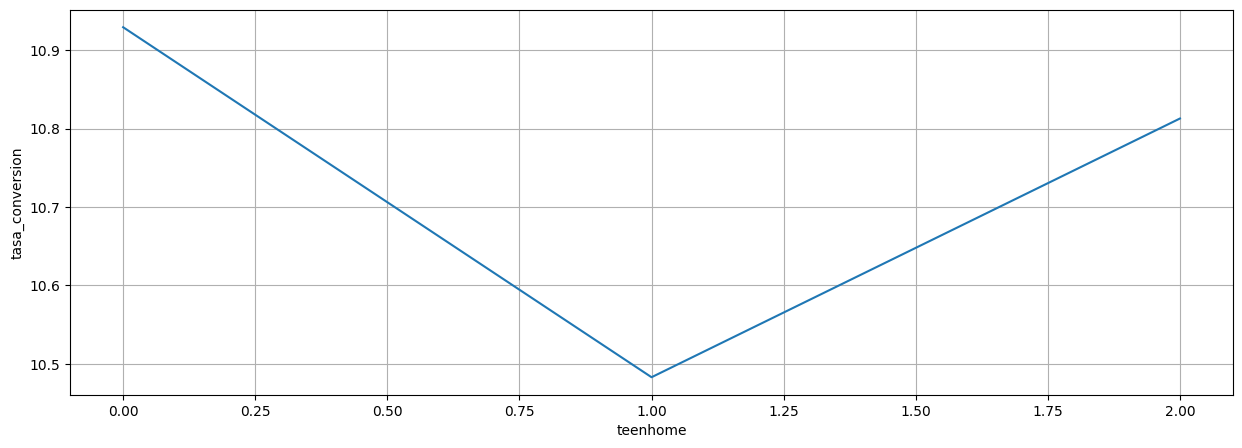

In [25]:
merge_graficas_tasas_conversion(df_merge, 'teenhome','y_bin', type='line')

/Users/eugecamperchioli/Desktop/BORRADORES DE CLASES/ENTREGA_PYTHONFORDATA/NOTEBOOK/../SRC/soporte.py:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo = df_merge.groupby(x)[y].mean().mul(100).rename('tasa_conversion').reset_index()


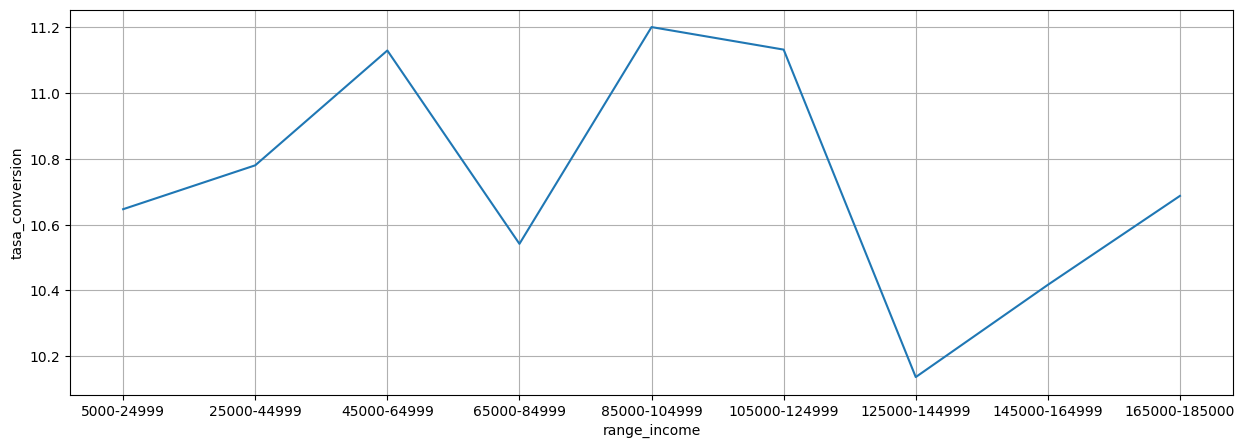

In [26]:
merge_graficas_tasas_conversion(df_merge, 'range_income','y_bin', type='line')

In [28]:
# creamos una columna que calcule los años del cliente con la empresa
df_merge['years_customer'] = round((df_merge['date'] - df_merge['dt_customer']).dt.days / 365, 2)

In [29]:
df_merge[['date', 'dt_customer','years_customer']].head()

,date,dt_customer,years_customer
0,2019-08-02,2012-04-04,7.33
1,2016-09-14,2012-12-30,3.71
2,2019-02-15,2012-02-02,7.04
3,2015-11-29,2012-12-21,2.94
4,2017-01-29,2012-06-20,4.61


In [31]:
df_merge['range_years_customer'] = pd.cut(
    df_merge['years_customer'],
    bins=[0, 2, 4, 6, 8, 10, float('inf')],
    labels=['0-1.99', '2-3.99', '4-5.99', '6-7.99', '8-9.99', '10+'],
    right=True
)



/Users/eugecamperchioli/Desktop/BORRADORES DE CLASES/ENTREGA_PYTHONFORDATA/NOTEBOOK/../SRC/soporte.py:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo = df_merge.groupby(x)[y].mean().mul(100).rename('tasa_conversion').reset_index()


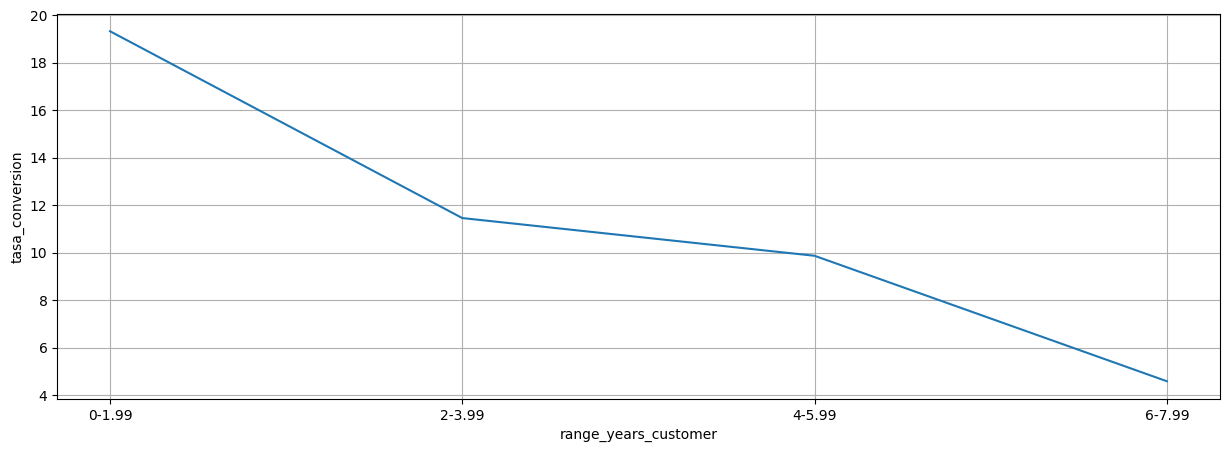

In [32]:
merge_graficas_tasas_conversion(df_merge, 'range_years_customer','y_bin', type='line')

CONCLUSIONES
- no vemos mucha inferencia en la probabilidad de adquirir el servicio con las variables de cantidad de hijos/adolescentes
- tampoco hay gran visibilidad con la variable de 'income' pero podemos mencionar que los clientes con un ingreso entre 85.000 y 124.000 tienen mayores probabilidades de adquirir el servicio. 
- donde vemos mayor relevancia es en la cantidad de años del cliente con la empresa, los clientes nuevos con 0 a 2 ańos de antiguedad tienen mayores probabilidades de adquirir el servicio seguidos de los de 3 a 4 años. 
